Predict customers' credit future spend on card, based on historical spend data and demographic parameters

Understanding the consumption pattern for credit cards at an individual consumer level is important for customer relationship management. This understanding allows banks to customize for consumers and make strategic marketing plans. Thus it is imperative to study the relationship between the characteristics of the consumers and their consumption patterns. __Bank of Trust__ has given a sample of their customers, along with their details like age, gender and other demographics. __Bank of Trust__ has also shared information on liabilities, assets and history of transactions with the bank for each customer. In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). The goal is to predict the average spend for the customers for the upcomning 3 months. 

In [1]:
import pandas as pd

In [2]:
# Loading data
df = pd.read_csv('Bank of Trust Dataset.csv')
# Split the data into features (X) and target (y)
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


# Data Preprocessing

In [3]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("LNumber of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq']
LNumber of columns with nans: 34


In [4]:
# List of numeric columns where we have to replace NaN values with 0
# Note: ideally we have to check with a domain expert whether filling a specific e,pty cells with 0 is appropriate
numeric_columns = [
    'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
    'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active',
    'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4',
    'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
    'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
    'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun'
]

# Fill NaN values with 0 in the specified columns
df[numeric_columns] = df[numeric_columns].fillna(0)

In [5]:
# Find columns with NaN values, and test that our zero filling has worked
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['loan_enq']
Number of columns with nans: 1


In [7]:
# Replace NaN values in the "loan_enq" column with 'N'
df.fillna({'loan_enq': 'N'}, inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [8]:
#  df has our data
X = df.drop('cc_cons', axis=1)
y = df['cc_cons']

# Define numerical and categorical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['account_type', 'gender', 'loan_enq']

# Create the preprocessing pipelines: scaling for numerical data, and encoding for categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.head(2)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
12665,29125,current,M,40,424,20011.05,0.0,7665.48,19991.0,11681.0,...,3.0,16.0,41000.0,62879.04,53597.93,6.0,14.0,48000.0,N,1474.3
20050,22432,current,M,22,723,9859.00,3473.0,1037.00,1187.0,5612.5,...,2.0,11.0,16901.0,26597.51,7612.00,4.0,15.0,5000.0,N,0.0


In [10]:
y_train.head()

12665      620
20050      372
893       1943
21491      881
21726    32020
Name: cc_cons, dtype: int64

In [11]:
# Apply the scaling and encoding transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train[:2]

array([[ 0.41790163,  0.4745146 , -0.69416884,  0.1361498 , -0.29384331,
        -0.29183089,  1.69499864,  0.17088608, -0.25094642,  0.7182671 ,
         0.08670607,  1.4641179 , -0.46561127,  0.51434489,  0.11224179,
        -0.32097467, -0.30053314, -0.16231651, -0.31103353, -0.22952608,
        -0.03597118, -0.09708223, -0.08974727, -0.07060041,  0.06925065,
         0.16428121,  0.92651539, -0.45717374,  0.04908393,  0.04821203,
        -0.15356069, -0.21744647,  0.25178783, -0.03094002, -0.03885138,
        -0.08091006,  0.10020071, -0.09427075,  0.05936268, -0.03039879,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [-0.07777052, -1.62230825,  0.89441764, -0.27413141,  0.12727036,
        -0.58731224, -0.14295897, -0.216256  , -0.14192995, -0.59589067,
        -0.84069138, -0.81919138,  0.59388377, -0.15915283, -0.01792696,
        -0.74445332, -0.30053314, -0.16231651, -0.31103353, -0.22952608,
        -0.03597118, -0.09708

In [12]:
import torch
# Convert numpy to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

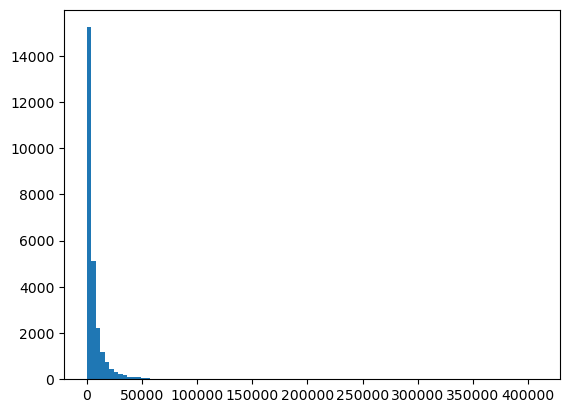

In [13]:
import matplotlib.pyplot as plt
plt.hist(y_train_tensor, bins=100)
plt.show()

In [14]:
# Define a custom root mean square logarithmic error function
def rmsle(y_pred, y_true):

    # Ensure that predictions are positive + 1 to avoid log(0)
    y_pred = torch.clamp(y_pred, min=0) + 1
    y_true = torch.clamp(y_true, min=0) + 1
    
    # Calculate the logarithms and compute the squared difference
    log_pred = torch.log(y_pred)
    log_true = torch.log(y_true)
    squared_log_error = (log_pred - log_true) ** 2
    
    # Compute mean of squared log error and take the square root
    mean_squared_log_error = torch.mean(squared_log_error)
    rmsle = torch.sqrt(mean_squared_log_error)
    
    return rmsle

# Model Training

In [15]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(X_test_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [17]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)

In [18]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)
train_loss_list=[]
test_loss_list = []
num_epochs = 30
train_loader = DataLoader(train_data, batch_size= 64, shuffle=True) 
# Execute the training loop
for epoch in range(num_epochs): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = rmsle(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = rmsle(model(X_train_tensor), y_train_tensor).item()
        # print(epoch,': ', train_loss)
    test_loss = rmsle(model(X_test_tensor), y_test_tensor).item()
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if (epoch+1) % 5 == 0: # printing after every 100 epochs
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    

Epoch 5: Train Loss: 1.5215, Test Loss: 1.5344
Epoch 10: Train Loss: 1.3227, Test Loss: 1.3379
Epoch 15: Train Loss: 1.3155, Test Loss: 1.3290
Epoch 20: Train Loss: 1.3150, Test Loss: 1.3267
Epoch 25: Train Loss: 1.3147, Test Loss: 1.3251
Epoch 30: Train Loss: 1.3145, Test Loss: 1.3238


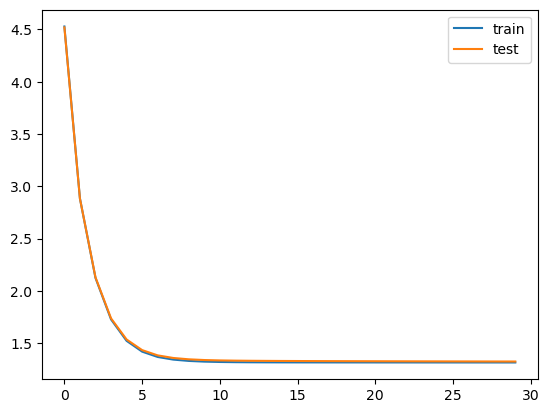

In [19]:
plt.plot(range(num_epochs),train_loss_list, label = 'train')
plt.plot(range(num_epochs),test_loss_list, label = 'test')
plt.legend()
plt.show()

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(X_test_tensor.shape[1], 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [21]:
model = Net()
optimizer = optim.Adam(model.parameters())
train_loss_list=[]
test_loss_list = []
num_epochs = 30
train_loader = DataLoader(train_data, batch_size= 128, shuffle=True) 
# Execute the training loop
for epoch in range(num_epochs): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = rmsle(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = rmsle(model(X_train_tensor), y_train_tensor).item()
        # print(epoch,': ', train_loss)
    test_loss = rmsle(model(X_test_tensor), y_test_tensor).item()
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if (epoch+1) % 5 == 0: # printing after every 100 epochs
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    

Epoch 5: Train Loss: 1.3177, Test Loss: 1.3200
Epoch 10: Train Loss: 1.3124, Test Loss: 1.3152
Epoch 15: Train Loss: 1.3111, Test Loss: 1.3157
Epoch 20: Train Loss: 1.3120, Test Loss: 1.3142
Epoch 25: Train Loss: 1.3107, Test Loss: 1.3147
Epoch 30: Train Loss: 1.3105, Test Loss: 1.3133


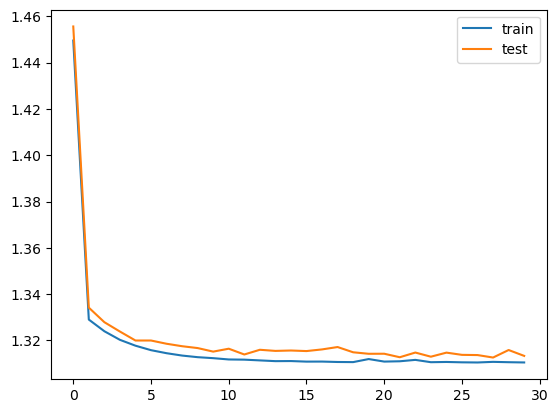

In [22]:
plt.plot(range(num_epochs),train_loss_list, label = 'train')
plt.plot(range(num_epochs),test_loss_list, label = 'test')
plt.legend()
plt.show()